In [1]:
! python -m  pip install tensorflow jupyterlab-vim autocompletion

In [2]:
! python -m pip install opencv-python 

In [3]:
! python3 -m pip install tensorflow[and-cuda]

In [4]:
! python -m pip install keras

In [2]:
import tensorflow as tf
import keras
import numpy as np
import os
import imghdr
import cv2
import matplotlib.pyplot as plt

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
image_exts = ['jpeg', 'jpg','bmp','png']
data_dir = '/Windows/Drive_2/work_2/image-classif-with-cnn/data'

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            with open(image_path,'r') as file:
                img = cv2.imread(image_path)
                ext = imghdr.what(image_path)      
            if ext not in image_exts:
                # print('Image not in .ext list {}'.format(image_path))
                os.remove(image_path)
        except OSError as e:
             # print('Issue with image {}'.format(image_path))
            pass

In [12]:
keras.utils.image_dataset_from_directory(data_dir,batch_size=8, image_size=(128,128))

Found 246 files belonging to 2 classes.


2024-04-06 09:06:05.794097: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-06 09:06:05.794724: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-06 09:06:05.795186: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
# loading the dataset

# this utility takes all the images from the specified directories
# does all the pre processing out of the box , and makes lives easy ig
data = keras.utils.image_dataset_from_directory(data_dir)

# converting to numpy iterator to access using our data pipelines
data_iterator = data.as_numpy_iterator()
batch =data_iterator.next()

Found 246 files belonging to 2 classes.


In [14]:
batch[0].shape

(32, 256, 256, 3)

In [15]:
batch[1]
# giving the list labels applied to the images 
# in this case 
# 0 = happy
# 1 => sad

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

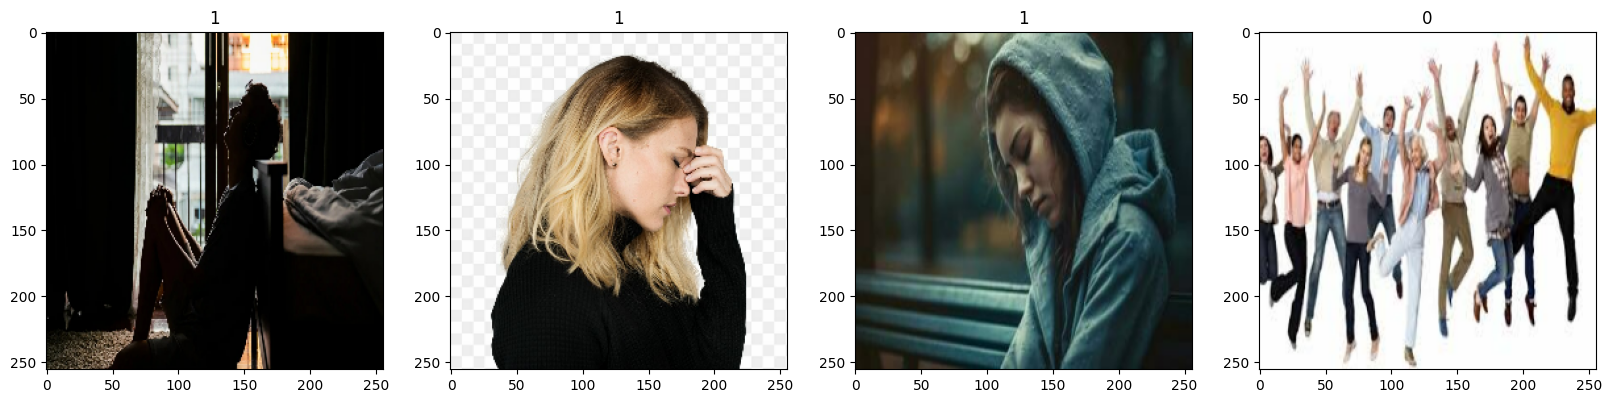

In [16]:
# plotting for batch 
fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][6:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
# preprocessing the data

In [18]:
# Note:
# batch[0] => has the images
# batch[1] => has the labels

# as the images are in RGB format

batch[0].max() # should give 255
batch[0].min() # should give 0 

0.0

In [19]:
# scaling them to 0 to 1 ( by dividing with 255 )

scaled = batch[0] / 255 
scaled.max() # o/p should be 1.0

1.0

In [20]:
# Note :
# we are trying implement all these with the help of pipeline , 
# So scaling things down like this won't be optimal
# We have to do it while loading the data itself

In [21]:
# so achieving that,
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset#transformations
data2 = data.map(lambda x, y: (x/255.0,y))


#converting to a numpy iterator

scaled_iterator = data2.as_numpy_iterator()
batch_scaled =scaled_iterator.next()

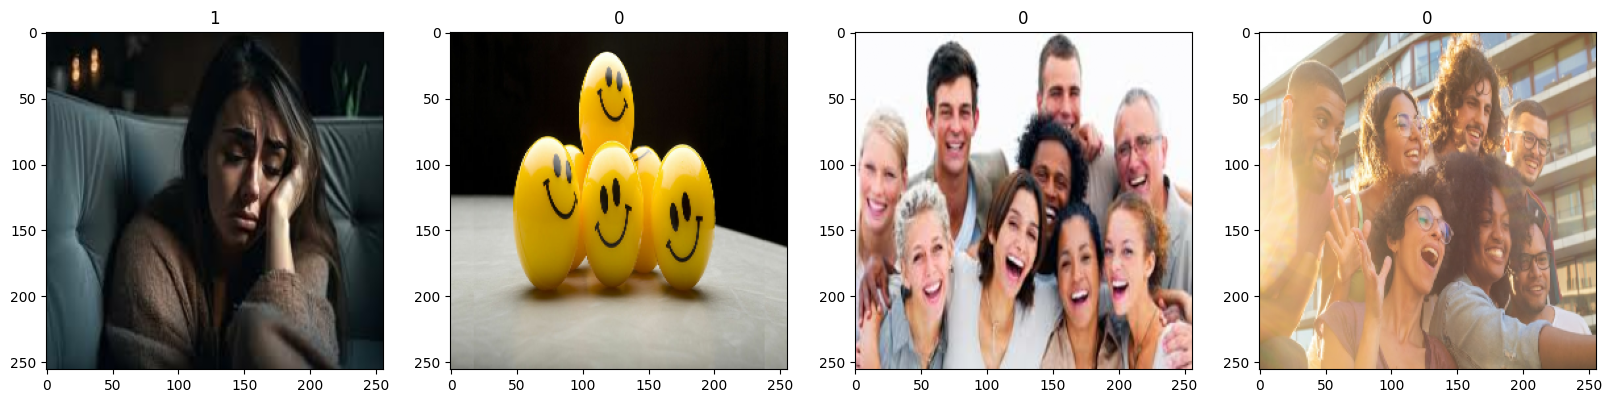

In [22]:
# plotting the scaled data

fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch_scaled[0][0:4]):
    
    # note the difference here
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch_scaled[1][idx])

In [23]:
# Splitting data
len(data2)

8

In [24]:
#manually splitting the dataset 

train_size = int(len(data)*.7 )
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [25]:
train_size+val_size+test_size # should be same as len(data2)

8

In [26]:
data2 # to skip the first n items from a dataset and select the rest

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
# we are allocating the batches here
# our data is already shuffled so we directly doing this step

train = data2.take(train_size)
val = data2.skip(train_size).take(val_size)
test = data2.skip(train_size+val_size).take(test_size)

In [28]:

# creating the model 


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [30]:
model  = Sequential??

Init signature: Sequential(layers=None, trainable=True, name=None)
Source:        
@keras_export(["keras.Sequential", "keras.models.Sequential"])
class Sequential(Model):
    """`Sequential` groups a linear stack of layers into a `Model`.

    Examples:

    ```python
    model = keras.Sequential()
    model.add(keras.Input(shape=(16,)))
    model.add(keras.layers.Dense(8))

    # Note that you can also omit the initial `Input`.
    # In that case the model doesn't have any weights until the first call
    # to a training/evaluation method (since it isn't yet built):
    model = keras.Sequential()
    model.add(keras.layers.Dense(8))
    model.add(keras.layers.Dense(4))
    # model.weights not created yet

    # Whereas if you specify an `Input`, the model gets built
    # continuously as you are adding layers:
    model = keras.Sequential()
    model.add(keras.Input(shape=(16,)))
    model.add(keras.layers.Dense(8))
    len(model.weights)  # Returns "2"

    # When using the delayed-b

In [31]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu')) # 256 is the no. of neurons
model.add(Dense(1,activation='sigmoid'))

/Windows/Drive_2/work_2/image-classif-with-cnn/.cnn-image/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [32]:
# 'relu' is added to make the values linear , as we are
# only dealing with linear values here

# maxpooling2D condenes the info 
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
logdir = 'log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train,epochs=20,validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20


I0000 00:00:1712374575.698468    6313 service.cc:145] XLA service 0x739e68005180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712374575.698543    6313 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-04-06 09:06:15.735552: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-06 09:06:15.896217: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


2/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5000 - loss: 0.9264

I0000 00:00:1712374582.618220    6313 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 245ms/step - accuracy: 0.5031 - loss: 0.9488 - val_accuracy: 0.4531 - val_loss: 0.8049
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.6035 - loss: 0.7069 - val_accuracy: 0.6562 - val_loss: 0.6121
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.7472 - loss: 0.5703 - val_accuracy: 0.7500 - val_loss: 0.5064
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.8227 - loss: 0.4046 - val_accuracy: 0.8594 - val_loss: 0.3676
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.8509 - loss: 0.3621 - val_accuracy: 0.8125 - val_loss: 0.3579
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.8924 - loss: 0.3545 - val_accuracy: 0.9219 - val_loss: 0.2994
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.9457 - loss: 0.2205 - val_accuracy: 0.9531 - val_loss: 0.1904
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9615 - loss: 0.1535 - val_accuracy: 1.0000 - val_loss: 0.1123
Ep

In [36]:
hist.history

{'accuracy': [0.4937500059604645,
  0.643750011920929,
  0.731249988079071,
  0.824999988079071,
  0.831250011920929,
  0.90625,
  0.9437500238418579,
  0.9624999761581421,
  0.925000011920929,
  0.9312499761581421,
  0.981249988079071,
  0.981249988079071,
  0.987500011920929,
  0.9937499761581421,
  0.9937499761581421,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.9563522338867188,
  0.6802366971969604,
  0.5614938735961914,
  0.4069458842277527,
  0.39785224199295044,
  0.3204116225242615,
  0.23162460327148438,
  0.13816894590854645,
  0.16675129532814026,
  0.12368354946374893,
  0.08728381991386414,
  0.07299307733774185,
  0.0430833101272583,
  0.03174471855163574,
  0.021396977826952934,
  0.00950684119015932,
  0.007208982948213816,
  0.005579724907875061,
  0.005366913042962551,
  0.0032339408062398434],
 'val_accuracy': [0.453125,
  0.65625,
  0.75,
  0.859375,
  0.8125,
  0.921875,
  0.953125,
  1.0,
  0.875,
  0.96875,
  0.96875,
  0.984375,
  1.0,
  1.0,
  0.984375,
  1

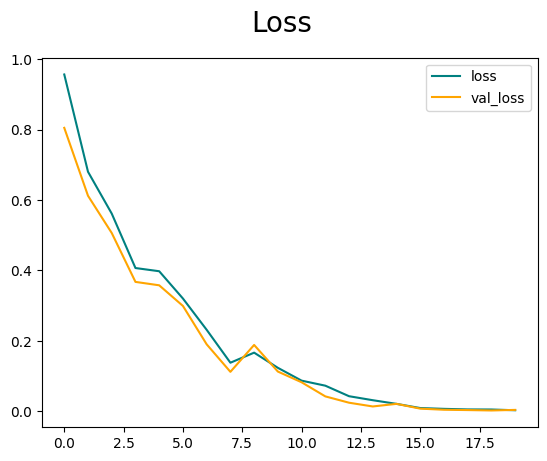

In [37]:
# plotting the performance

fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [38]:
# note:
# if the loss is decreasing , but the val_loss => increasing
# which means the model is overfitting

# it can be a straight line as well , if you know what i mean
# that means problem with the data which has been used or the way it's used


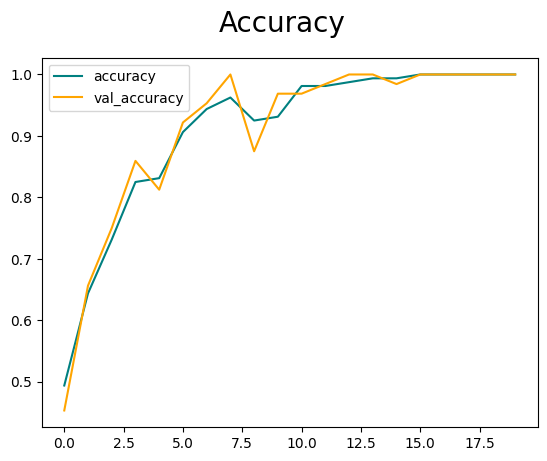

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
# testing our model (evaluation)

In [41]:
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy

In [42]:
precision= Precision()
recall = Recall()
binAcc = BinaryAccuracy()

In [43]:
len(test)

1

In [53]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y,yhat) 
    recall.update_state(y,yhat)
    binAcc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


2024-04-06 09:13:01.352342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [64]:
print(f'{precision.result().numpy()},{recall.result().numpy()},{binAcc.result().numpy()}')

1.0,1.0,1.0


In [ ]:
# all the above results are 100% fine , 
# so testing it with new data

In [ ]:
import cv2

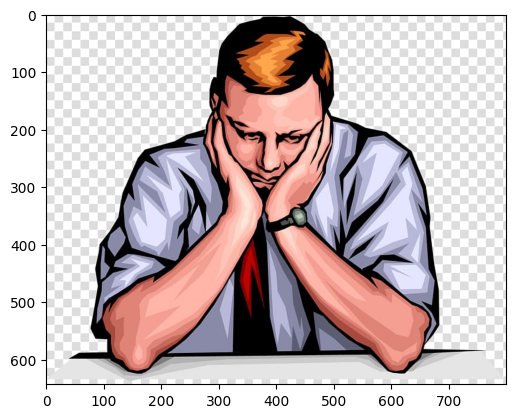

In [82]:
# getting a random img from the internet
# sad test
img = cv2.imread('/Windows/Drive_2/work_2/image-classif-with-cnn/data/sad_test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

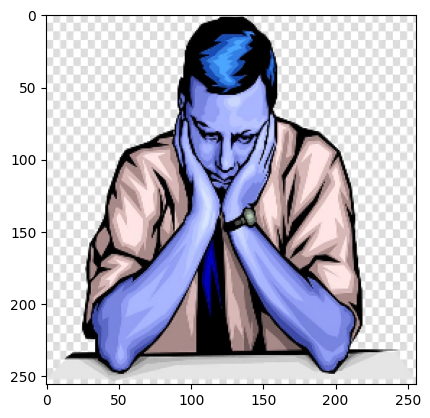

TensorShape([256, 256, 3])

In [93]:
# resizing the image
img = cv2.imread('/Windows/Drive_2/work_2/image-classif-with-cnn/data/sad_test.jpg')
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [94]:
resize.shape

TensorShape([256, 256, 3])

In [87]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [95]:
# scaling the image as well

yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [96]:
yhat
# it is successful since the input we gave was a sad person ,
# and 1 was the label assigned to sad person

array([[1.]], dtype=float32)

In [97]:
if yhat > 0.5:
    print(f'predicted sad')
else:
    print(f'predicted happy')

predicted sad


In [ ]:
# happy test

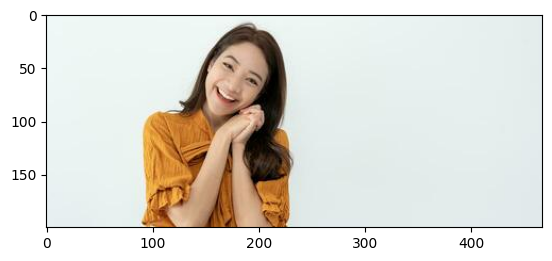

In [132]:
img = cv2.imread('/Windows/Drive_2/work_2/image-classif-with-cnn/data/happy_test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
resize2 = tf.image.resize(img , (256,256))
plt.show()

In [137]:
yhat2 = model.predict(np.expand_dims(resize2/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [138]:
yhat2

array([[0.9369884]], dtype=float32)

In [139]:
if yhat2 > 0.5:
    print(f'predicted sad')
else:
    print(f'predicted happy')

predicted sad


In [ ]:
# saving the model

In [107]:
from tensorflow.keras.models import load_model

In [115]:
# h5 is serialization method
model.save(os.path.join('models','happy_sad_predict_cnn.h5'))

In [117]:
# recommended by keras
keras.saving.save_model(model,'happy_sad_predict_cnn_keras.keras');

In [121]:
# loading the model

new_model = load_model(os.path.join('models','happy_sad_predict_cnn_keras.keras'))

In [122]:
new_model

<Sequential name=sequential, built=True>

In [131]:
yhat = new_model.predict(np.expand_dims(resize/255,0))
if yhat > 0.5:
    print(f'predicted sad')
else:
    print(f'predicted happy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
predicted sad


In [130]:
yhat = new_model.predict(np.expand_dims(resize2/255,0))
if yhat > 0.5:
    print(f'predicted sad')
else:
    print(f'predicted happy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
predicted sad


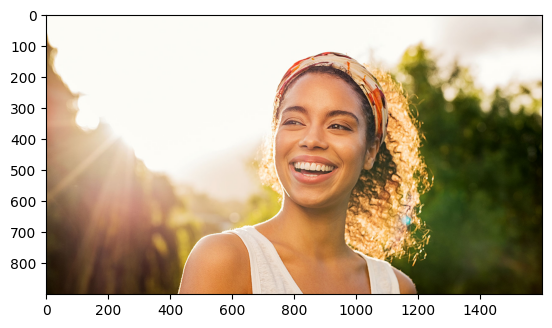

In [142]:
# another test
img = cv2.imread('/Windows/Drive_2/work_2/image-classif-with-cnn/data/happy_test_2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
resize3 = tf.image.resize(img , (256,256))
plt.show()

In [143]:
yhat = model.predict(np.expand_dims(resize3/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [144]:
yhat

array([[0.74488163]], dtype=float32)

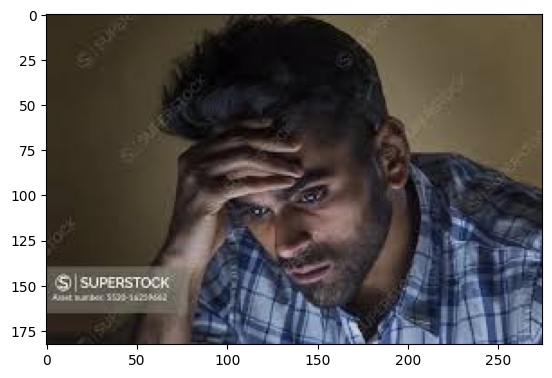

In [145]:
# another test
img = cv2.imread('/Windows/Drive_2/work_2/image-classif-with-cnn/data/sad_test_2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
resize3 = tf.image.resize(img , (256,256))
plt.show()

In [146]:
yhat = model.predict(np.expand_dims(resize3/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [147]:
yhat

array([[0.99926597]], dtype=float32)

In [148]:
# since we have used a very very small dataset, the problem occured is overfitting
# the model is giving poor results with new test data